1. Sửa tên cột thành tiếng việt
2. kiểm tra null -> cho null là median (numeric) | mode (categorical)
3. xóa duplicate
----------
4. chạy lại heatmap
-> kết luận
-------------
5. train nhiều x (tối thiểu 3 x có màu heatmap đậm nhất)

# Tiền xử lý dữ liệu
- Load dữ liệu từ CSV - is null
- duplicate 
- outliter
- format/ title

In [87]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("data/du_lieu_vay.csv")
df.head()


,ACTIONTYPE,ACTIONDATE,ASSISTANCETYPE,RECORDTYPE,FAIN,AWARDMODIFICATIONAMENDMENTNUM,URI,CORRECTIONLATEDELETEIND,FISCALYEARANDQTRCORRECTION,SAI_NUM,...,PRIMPLACEOFPERFORMANCEFOREIGNLOCATIONDESC,PRIMPLACEOFPERFORMANCECONGRESSIONALDISTRICT,AWARDDESC,PERIODOFPERFORMANCESTARTDATE,PERIODOFPERFORMANCECURRENTENDDATE,FEDERALACTIONOBLIGATION,NONFEDERALFUNDINGAMOUNT,FACEVALUEOFDIRECTLOANORLOANGUARANTEE,ORIGINALLOANSUBSIDYCOST,BUSINESSFUNDSINDICATOR
0,A,20200803,7,2,2443918208,1,NaN,NaN,NaN,SAI Exempt,...,NaN,12,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,144000.0,19612.80,NON
1,A,20200803,7,2,2446098206,1,NaN,NaN,NaN,SAI Exempt,...,NaN,1,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,25300.0,3445.86,NON
2,A,20200803,7,2,2448018208,1,NaN,NaN,NaN,SAI Exempt,...,NaN,12,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,100000.0,13620.00,NON
3,A,20200803,7,2,2449338201,1,NaN,NaN,NaN,SAI Exempt,...,NaN,12,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,28600.0,3895.32,NON
4,A,20200803,7,2,2455458209,1,NaN,NaN,NaN,SAI Exempt,...,NaN,2,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,98400.0,13402.08,NON


In [88]:
print("CỘT GỐC:")
print(df.columns)

print("\nCỘT SAU KHI RENAME:")
print(df_display.columns)


CỘT GỐC:
Index(['ACTIONTYPE', 'ACTIONDATE', 'ASSISTANCETYPE', 'RECORDTYPE', 'FAIN',
       'AWARDMODIFICATIONAMENDMENTNUM', 'URI', 'CORRECTIONLATEDELETEIND',
       'FISCALYEARANDQTRCORRECTION', 'SAI_NUM',
       'AWARDEEORRECIPIENTLEGALENTITYNAME',
       'AWARDEEORRECIPIENTUNIQUEIDENTIFIER', 'LEGALENTITYADDRLINE1',
       'LEGALENTITYADDRLINE2', 'LEGALENTITYADDRLINE3', 'LEGALENTITYCITYNAME',
       'LEGALENTITYSTATECD', 'LEGALENTITYZIP5', 'LEGALENTITYZIPLAST4',
       'LEGALENTITYCOUNTRYCD', 'LEGALENTITYFOREIGNCITYNAME',
       'LEGALENTITYFOREIGNPROVINCENAME', 'LEGALENTITYFOREIGNPOSTALCD',
       'LEGALENTITYCONGRESSIONALDISTRICT', 'BUSINESSTYPES', 'FUNDINGAGENCYCD',
       'FUNDINGSUBTIERAGENCYCD', 'FUNDINGOFFICECD', 'AWARDINGAGENCYCD',
       'AWARDINGSUBTIERAGENCYCD', 'AWARDINGOFFICECD', 'CFDA_NUM',
       'PRIMPLACEOFPERFORMANCECD', 'PRIMPLACEOFPERFORMANCECOUNTRYCD',
       'PRIMPLACEOFPERFORMANCEZIP+4',
       'PRIMPLACEOFPERFORMANCEFOREIGNLOCATIONDESC',
       'PRIMPLACEOFPERF

In [89]:
print("\nSố giá trị null:")
print(df.isnull().sum())

df = df.drop_duplicates()
print("\nSau khi loại bỏ trùng:", df.shape)


Số giá trị null:
ACTIONTYPE                                        0
ACTIONDATE                                        0
ASSISTANCETYPE                                    0
RECORDTYPE                                        0
FAIN                                              0
AWARDMODIFICATIONAMENDMENTNUM                     0
URI                                            2828
CORRECTIONLATEDELETEIND                        2828
FISCALYEARANDQTRCORRECTION                     2828
SAI_NUM                                           0
AWARDEEORRECIPIENTLEGALENTITYNAME                 0
AWARDEEORRECIPIENTUNIQUEIDENTIFIER             2828
LEGALENTITYADDRLINE1                              1
LEGALENTITYADDRLINE2                           2828
LEGALENTITYADDRLINE3                           2828
LEGALENTITYCITYNAME                               0
LEGALENTITYSTATECD                                0
LEGALENTITYZIP5                                   0
LEGALENTITYZIPLAST4                           

In [90]:

# --- Tạo bản sao và đổi tên ---
df_display = df.copy()

column_mapping = {
    'FEDERALACTIONOBLIGATION': 'Nghĩa_vụ_Hành_động_Liên_bang',
    'NONFEDERALFUNDINGAMOUNT': 'Tổng_tiền_Tài_trợ_Phi_Liên_bang',
    'FACEVALUEOFDIRECTLOANORLOANGUARANTEE': 'Giá_trị_Khoản_Vay_Trực_tiếp',
    'ORIGINALLOANSUBSIDYCOST': 'Chi_phí_Trợ_cấp_Ban_đầu',
    'LEGALENTITYSTATECD': 'Mã_Bang',
    'ASSISTANCETYPE': 'Loại_hình_Hỗ_trợ'
}

df_display = df_display.rename(columns=column_mapping)

# --- 3. Chuẩn hóa kiểu dữ liệu số ---
numerical_cols_vn = [
    'Nghĩa_vụ_Hành_động_Liên_bang',
    'Tổng_tiền_Tài_trợ_Phi_Liên_bang',
    'Giá_trị_Khoản_Vay_Trực_tiếp',
    'Chi_phí_Trợ_cấp_Ban_đầu'
]

for col in numerical_cols_vn:
    if col in df_display.columns:
        df_display[col] = pd.to_numeric(df_display[col], errors='coerce')


# --- 4. Hiển thị 5 hàng đầu tiên ---
print("5 hàng đầu tiên với tên cột tiếng Việt (Đã sửa lỗi):")
print(df_display[['Giá_trị_Khoản_Vay_Trực_tiếp', 'Chi_phí_Trợ_cấp_Ban_đầu', 'Mã_Bang', 'Loại_hình_Hỗ_trợ']].head())

5 hàng đầu tiên với tên cột tiếng Việt (Đã sửa lỗi):
   Giá_trị_Khoản_Vay_Trực_tiếp  Chi_phí_Trợ_cấp_Ban_đầu Mã_Bang  \
0                     144000.0                 19612.80      CA   
1                      25300.0                  3445.86      PA   
2                     100000.0                 13620.00      OH   
3                      28600.0                  3895.32      MI   
4                      98400.0                 13402.08      TX   

   Loại_hình_Hỗ_trợ  
0                 7  
1                 7  
2                 7  
3                 7  
4                 7  


In [91]:
df = df.drop_duplicates()

In [92]:
import numpy as np

def detect_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

outliers = detect_outlier_iqr(df["FACEVALUEOFDIRECTLOANORLOANGUARANTEE"])
df[outliers]
    

,ACTIONTYPE,ACTIONDATE,ASSISTANCETYPE,RECORDTYPE,FAIN,AWARDMODIFICATIONAMENDMENTNUM,URI,CORRECTIONLATEDELETEIND,FISCALYEARANDQTRCORRECTION,SAI_NUM,...,PRIMPLACEOFPERFORMANCEFOREIGNLOCATIONDESC,PRIMPLACEOFPERFORMANCECONGRESSIONALDISTRICT,AWARDDESC,PERIODOFPERFORMANCESTARTDATE,PERIODOFPERFORMANCECURRENTENDDATE,FEDERALACTIONOBLIGATION,NONFEDERALFUNDINGAMOUNT,FACEVALUEOFDIRECTLOANORLOANGUARANTEE,ORIGINALLOANSUBSIDYCOST,BUSINESSFUNDSINDICATOR
132,C,20200914,7,2,4554418202,10,NaN,NaN,NaN,SAI Exempt,...,NaN,45,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,-125000.0,-17025.00,NON
247,C,20200828,7,2,5771528201,8,NaN,NaN,NaN,SAI Exempt,...,NaN,2,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,-150000.0,-20430.00,NON
493,C,20201028,7,2,6416798201,8,NaN,NaN,NaN,SAI Exempt,...,NaN,6,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,-126000.0,-17161.20,NON
621,C,20200922,7,2,6426678204,8,NaN,NaN,NaN,SAI Exempt,...,NaN,3,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,-100100.0,-13633.62,NON
669,C,20200915,7,2,6429178202,8,NaN,NaN,NaN,SAI Exempt,...,NaN,6,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,-136000.0,-18523.20,NON
685,C,20200827,7,2,6450038200,8,NaN,NaN,NaN,SAI Exempt,...,NaN,10,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,-103400.0,-14083.08,NON
850,C,20200930,7,2,7722818208,8,NaN,NaN,NaN,SAI Exempt,...,NaN,33,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,-135000.0,-18387.00,NON
2094,C,20201028,7,2,8659868202,8,NaN,NaN,NaN,SAI Exempt,...,NaN,2,TO PROVIDE LOANS TO RESTORE AS NEARLY AS POSSI...,NaN,NaN,NaN,NaN,-100000.0,-8920.00,NON


In [93]:
if 'outliers' in locals():
    df = df[~outliers]


In [94]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)


In [95]:
print("Thông tin kiểu dữ liệu (Dtypes):")
print(df.info())
print("\n5 hàng đầu tiên:")
print(df.head())

Thông tin kiểu dữ liệu (Dtypes):
<class 'pandas.core.frame.DataFrame'>
Index: 2820 entries, 0 to 2827
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   actiontype                                   2820 non-null   object 
 1   actiondate                                   2820 non-null   int64  
 2   assistancetype                               2820 non-null   int64  
 3   recordtype                                   2820 non-null   int64  
 4   fain                                         2820 non-null   int64  
 5   awardmodificationamendmentnum                2820 non-null   int64  
 6   uri                                          0 non-null      float64
 7   correctionlatedeleteind                      0 non-null      float64
 8   fiscalyearandqtrcorrection                   0 non-null      float64
 9   sai_num                                      2

In [96]:
# Lọc NULL cho biến số
df = df.dropna(subset=numerical_cols)

# Điền giá trị thiếu cho biến phân loại
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

print("\nĐã xử lý giá trị thiếu:")
print(df[numerical_cols + categorical_cols].isnull().sum())


Đã xử lý giá trị thiếu:
originalloansubsidycost                 0
facevalueofdirectloanorloanguarantee    0
assistancetype                          0
fundingagencycd                         0
legalentitystatecd                      0
businesstypes                           0
dtype: int64


In [97]:
numerical_cols = ['federalactionobligation', 'nonfederalfundingamount', 'facevalueofdirectloanorloanguarantee', 'originalloansubsidycost']
categorical_cols = ['assistancetype', 'fundingagencycd', 'legalentitystatecd', 'businesstypes']

# Phân tích mối quan hệ của các thuộc tính
- heatmap 
- biểu đồ (cột/ đường/ top 10) -> sau mỗi biểu đồ căn 1 kết luận

In [98]:
df_cleaned_num = df.dropna(subset=numerical_cols)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


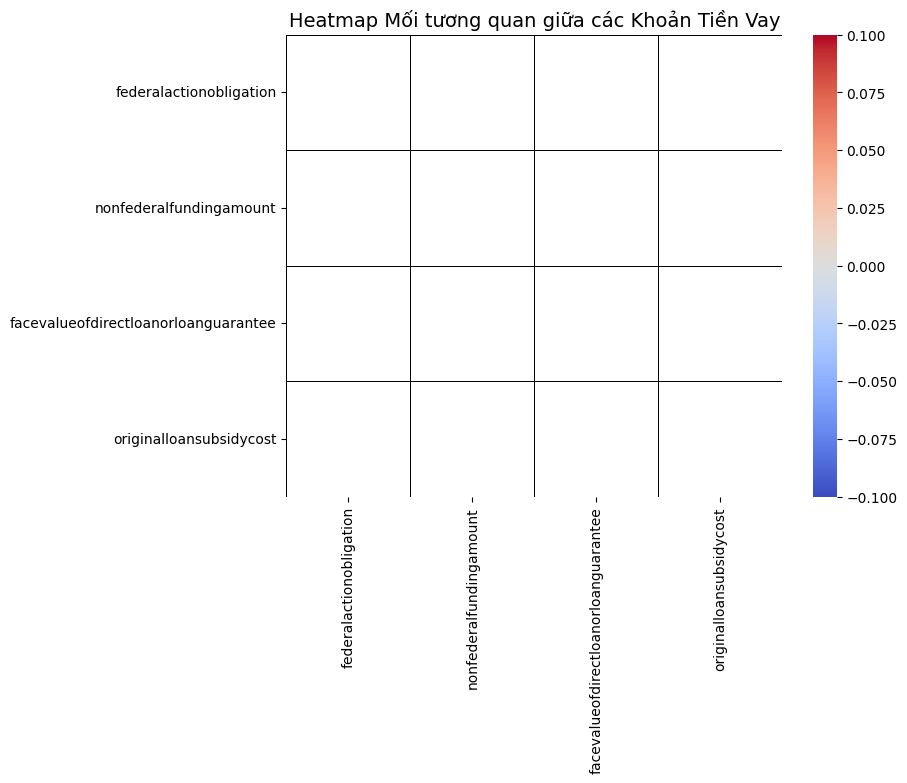

In [ ]:


# Tính ma trận tương quan (Correlation Matrix)
correlation_matrix = df_cleaned_num[numerical_cols].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='black'
)
plt.title('Heatmap Mối tương quan giữa các Khoản Tiền Vay', fontsize=14)
plt.show()


In [100]:
# Chọn cột số để phân tích
target_col = 'facevalueofdirectloanorloanguarantee'
category_col = 'legalentitystatecd'

# Tổng giá trị khoản vay theo bang
state_loan_summary = df.groupby(category_col)[target_col].sum().sort_values(ascending=False)

# Top 10
top_10_states = state_loan_summary.head(10) / 1e8

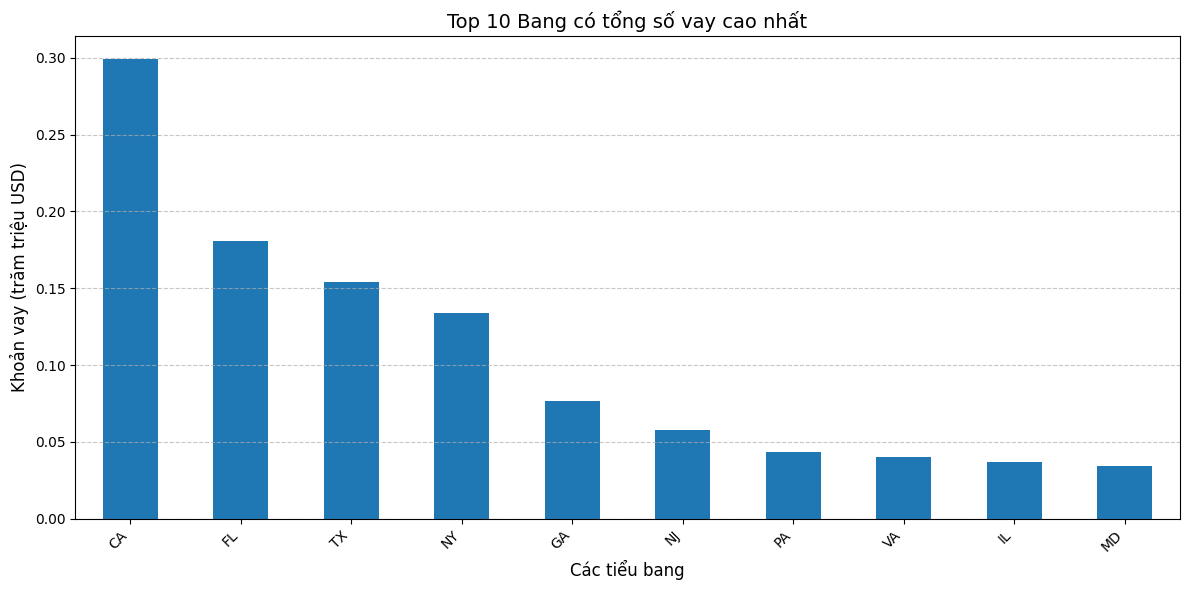

In [101]:

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
top_10_states.plot(kind='bar')
plt.title('Top 10 Bang có tổng số vay cao nhất', fontsize=14)
plt.xlabel('Các tiểu bang', fontsize=12)
plt.ylabel('Khoản vay (trăm triệu USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Train - test - prediction

- Tạo mô hình
- Chia tập train - test
- Train (fit)
- Đánh giá mô hình với R^2 + MSE với tập test
- Dự đoán (có thể vẽ mô hình)

In [ ]:
# tạo mô  hình
#  Dữ liệu đầy đủ và có tương quan mạnh (0.87)
numerical_cols = ['originalloansubsidycost', 'facevalueofdirectloanorloanguarantee']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#BỎ CÁC HÀNG CÓ GIÁ TRỊ THIẾU
df_model = df.dropna(subset=numerical_cols).copy()

# Chọn biến X và y cho mô hình hồi quy tuyến tính
# X (Biến độc lập): Chi phí Trợ cấp Ban đầu
# y (Biến phụ thuộc): Giá trị Khoản vay
# Hai biến có mối tương quan mạnh (~0.87) theo phân tích heatmap

# X = Biến Độc lập (Chi phí Trợ cấp)
X = df_model[['originalloansubsidycost']] 
# y = Biến Phụ thuộc (Giá trị Khoản vay)
y = df_model['facevalueofdirectloanorloanguarantee']

In [103]:
# chia tập train - test
# Chia tập dữ liệu (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập Training (X_train): {X_train.shape[0]} hàng")
print(f"Kích thước tập Testing (X_test): {X_test.shape[0]} hàng")

Kích thước tập Training (X_train): 2256 hàng
Kích thước tập Testing (X_test): 564 hàng


In [104]:
# train(fit)
model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
coefficient = model.coef_[0]

print(f"Phương trình Hồi quy: y = {coefficient:.4f} * X + {intercept:.4f}")

Phương trình Hồi quy: y = 7.6950 * X + 4986.2433


In [105]:
# Đánh giá mô hình với R^2 + MSE với tập test
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"1. Hệ số Xác định (R^2): {r2:.4f}")
print(f"2. Sai số Bình phương Trung bình (MSE): {mse:.2f}")

1. Hệ số Xác định (R^2): 0.9221
2. Sai số Bình phương Trung bình (MSE): 152192904.85


In [106]:
print("\n--- DỰ ĐOÁN KHOẢN VAY VỚI DỮ LIỆU MỚI ---")

try:
    # Nhập dữ liệu từ người dùng
    new_subsidy_cost = float(input("Nhập Chi phí Trợ cấp Ban đầu (originalloansubsidycost): "))

    # Chuyển về dạng DataFrame
    new_data = pd.DataFrame({
        'originalloansubsidycost': [new_subsidy_cost]
    })

    # Dự đoán
    predicted_loan = model.predict(new_data)

    print(f"\ngiá trị Khoản vay Dự đoán: {predicted_loan[0]:,.2f}")

except ValueError:
    print("lỗi:vui lòng nhập số hợp lệ!")


--- DỰ ĐOÁN KHOẢN VAY VỚI DỮ LIỆU MỚI ---

giá trị Khoản vay Dự đoán: 5,070.89


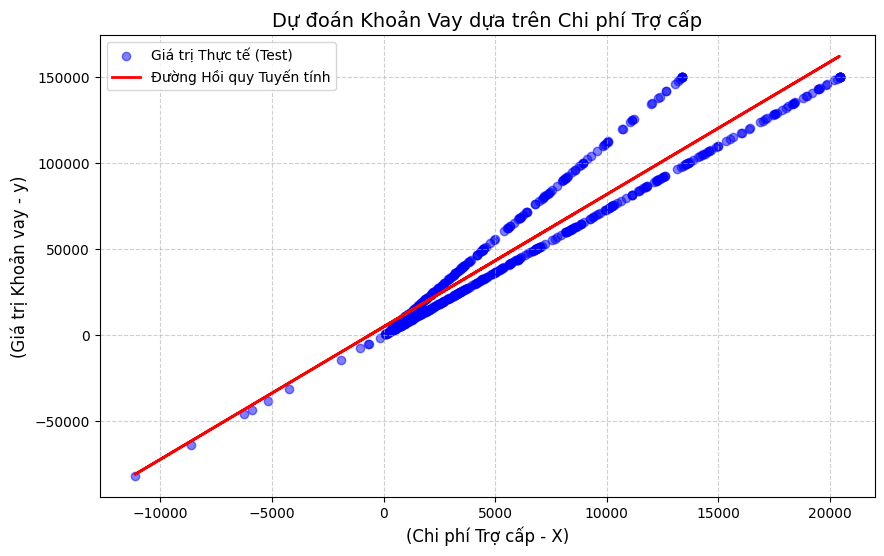

In [107]:
# Dự đoán (có thể vẽ mô hình)
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='blue', label='Giá trị Thực tế (Test)', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Đường Hồi quy Tuyến tính') 

plt.title('Dự đoán Khoản Vay dựa trên Chi phí Trợ cấp', fontsize=14)
plt.xlabel('(Chi phí Trợ cấp - X)', fontsize=12)
plt.ylabel('(Giá trị Khoản vay - y)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()